In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
data = pd.read_csv(r"E:\Placement predictor dataset\placementdata.csv")

encoder = LabelEncoder()
data['PlacementStatus'] = encoder.fit_transform(data['PlacementStatus'])


In [ ]:
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols.remove('PlacementStatus')  # Remove target column from features
X = data[numerical_cols]
y = data['PlacementStatus']

In [ ]:
# Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(random_state=42, n_estimators=100)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred = rf_model.predict(X_test)

# Evaluate performance
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}
results_df = pd.DataFrame([results], index=['Random Forest'])

feature_importance = rf_model.feature_importances_

                    Feature  Importance
8                 HSC_Marks    0.192591
5         AptitudeTestScore    0.164109
0                 StudentID    0.128917
7                 SSC_Marks    0.125986
1                      CGPA    0.122088
6          SoftSkillsRating    0.089724
3                  Projects    0.084585
4  Workshops/Certifications    0.063352
2               Internships    0.028647


<Figure size 800x500 with 0 Axes>

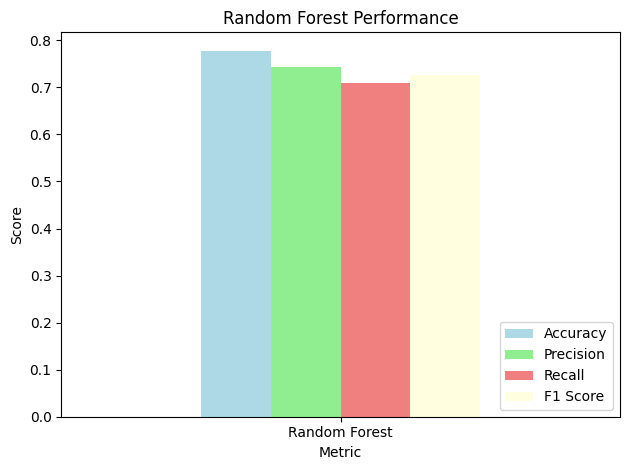

               Accuracy  Precision    Recall  F1 Score
Random Forest     0.778   0.743038  0.708937  0.725587


In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': feature_importance
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

plt.figure(figsize=(8, 5))
results_df.plot(kind='bar', color=['lightblue', 'lightgreen', 'lightcoral', 'lightyellow'])
plt.title('Random Forest Performance')
plt.ylabel('Score')
plt.xlabel('Metric')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

print(results_df)

In [ ]:
# Train a Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

feature_importance = rf_model.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': numerical_cols,
    'Importance': feature_importance
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the most important features
print(feature_importance_df)

                    Feature  Importance
8                 HSC_Marks    0.192591
5         AptitudeTestScore    0.164109
0                 StudentID    0.128917
7                 SSC_Marks    0.125986
1                      CGPA    0.122088
6          SoftSkillsRating    0.089724
3                  Projects    0.084585
4  Workshops/Certifications    0.063352
2               Internships    0.028647
